In [1]:
import matplotlib.pyplot as plt  
import numpy as np
from scipy.io import loadmat

# 导入数据集

In [2]:
data2 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data2_train.mat")
data3 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data3_train.mat")
data5 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data5_train.mat")
data6 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data6_train.mat")
data8 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data8_train.mat")
data10 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data10_train.mat")
data11 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data11_train.mat")
data12 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data12_train.mat")
data14 = loadmat("E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data14_train.mat")

In [3]:
data2 = data2['data2_train']
data3 = data3['data3_train']
data5 = data5['data5_train']
data6 = data6['data6_train']
data8 = data8['data8_train']
data10 = data10['data10_train']
data11 = data11['data11_train']
data12 = data12['data12_train']
data14 = data14['data14_train']

In [4]:
#将不同类别的样本合并成一个大的数据集
data= np.concatenate((data2,data3,data5,data6,data8,data10,data11,data12,data14),axis=0)

In [5]:
import pandas as pd

In [6]:
data=pd.DataFrame(data)

# 创建类别标签

In [7]:
print(len(data2))
print(len(data3))
print(len(data5))
print(len(data6))
print(len(data8))
print(len(data10))
print(len(data11))
print(len(data12))
print(len(data14))

1071
622
362
547
358
729
1841
445
949


In [8]:
y2 = np.linspace(2,2 , num=1071)
y3 = np.linspace(3,3 , num=622)
y5 = np.linspace(5,5 , num=362)
y6 = np.linspace(6,6 , num=547)
y8 = np.linspace(8,8 , num=358)
y10 = np.linspace(10,10 , num=729)
y11 = np.linspace(11,11 , num=1841)
y12 = np.linspace(12,12 , num=445)
y14 = np.linspace(14,14 , num=949)

In [9]:
y= np.concatenate((y2,y3,y5,y6,y8,y10,y11,y12,y14),axis=0)

In [10]:
y=pd.DataFrame(y)

# 查看不同类别间的相似度

In [11]:
import seaborn as sns

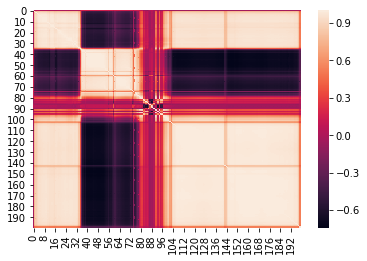

In [12]:
m = data.corr()  #test_feature => pandas.DataFrame#
sns.heatmap(m)
plt.show()

颜色越深代表特征间的相似度越低，颜色越浅，代表相似度越高，可以看出，部分特征之间的相似度还是很高的，具备进行降维处理的条件，以减少计算量，但是经过多次试验，我选用的模型，在降维处理过后，预测的正确率却降低了，所以我选择不进行降维处理

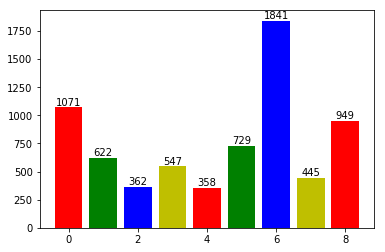

In [13]:
name_list = ['y2', 'y3', 'y5','y6','y8','y10','y11','y12','y14']
num_list = [1071,622,362,547,358,729,1841,445,949]
rects=plt.bar(range(len(num_list)), num_list, color='rgby')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

通过直方图可以直观的看出来不同类别之间不均衡

# 划分数据集为训练集和验证集

In [14]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.3)

D:\lala\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# SMOTE算法处理不均衡数据

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
# 对训练数据集作平衡处理
over_samples = SMOTE(random_state=None)
over_samples_X,over_samples_y = over_samples.fit_sample(x_train, y_train)
# 重抽样后的类别比例
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

D:\lala\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\lala\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11.0    0.111111
5.0     0.111111
3.0     0.111111
2.0     0.111111
10.0    0.111111
14.0    0.111111
6.0     0.111111
12.0    0.111111
8.0     0.111111
dtype: float64


# 随机森林模型

In [17]:
from sklearn import metrics

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf=RandomForestClassifier(n_estimators=30,random_state=1,min_samples_leaf=2)
clf.fit(over_samples_X,over_samples_y)
predictions=clf.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))

0.8917228103946102


In [20]:
print(metrics.classification_report(y_test,predictions))

             precision    recall  f1-score   support

        2.0       0.89      0.84      0.87       324
        3.0       0.92      0.61      0.74       194
        5.0       0.95      0.98      0.96       124
        6.0       0.96      1.00      0.98       159
        8.0       0.97      1.00      0.99       110
       10.0       0.87      0.87      0.87       211
       11.0       0.80      0.91      0.86       524
       12.0       0.84      0.86      0.85       125
       14.0       0.99      0.98      0.99       307

avg / total       0.90      0.89      0.89      2078



# 测试集的导入以及预测

In [21]:
#训练集的导入
test_x = loadmat('E:\机器学习\Training-18b-2016-master\9个类别的数据集-train\data_test_final.mat')
test_x = test_x['data_test_final']

In [22]:
#预测
test_y=clf.predict(test_x)

In [23]:
test_y

array([ 6.,  5.,  3., ..., 14., 12.,  6.])

In [24]:
#保存
test_y = pd.DataFrame(test_y)
test_y.to_csv('E:/机器学习/Training-18b-2016-master/9个类别的数据集-train/test_y1.csv',index=False,header=False)